## What is Tensorflow?

*TF is not a magical machine learning robot*

- It has had a wide coverage in the general news media, e.g. in NYT.
- It is merely an extensive library for performing numerical computations that are optimized towards running neural networks on GPUs as well as CPUs.
- TF is not that different from other numerical libraries based on computational graphs, e.g. Theano.

## Computational Graphs

Computational graphs can be seen as a nice way of structuring mathematical expressions wrt order of operations, declarative programming. Let us say that we have following expression:

$c=\sqrt{a^2+b^2}\ .$

This equation needs to be performed in the correct order to give the correct result. Therefore we define 3 operations, in this example with fixed values (a=3, b=4):

In [16]:
import tensorflow as tf

In [17]:
a = tf.constant(3.0, tf.float32)
b = tf.constant(4.0, tf.float32)
c = tf.sqrt(tf.add(tf.square(a), tf.square(b)))

print(a, b, c)

Tensor("Const_21:0", shape=(), dtype=float32) Tensor("Const_22:0", shape=(), dtype=float32) Tensor("Sqrt:0", shape=(), dtype=float32)


In [18]:
sess = tf.Session()
print(*sess.run([a, b, c]))

3.0 4.0 5.0


In [19]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.sqrt(tf.add(tf.square(a), tf.square(b)))

print(a, b, c)

sess = tf.Session()
print(*sess.run([a, b, c], feed_dict={a: 4., b: 3.}))

Tensor("Placeholder_16:0", dtype=float32) Tensor("Placeholder_17:0", dtype=float32) Tensor("Sqrt_1:0", dtype=float32)
4.0 3.0 5.0


In [20]:
print(*sess.run([a, b, c], feed_dict={a: 4., b: 4.}))

4.0 4.0 5.65685


### Differentiation

Backpropagation is one of the most essential building blocks in deep learning. An optimal way of performing backpropagation is by using the computational graph to take the partial derivatives between variabels. This way we sum over the derivatives of the nodes in the graph.

So let's consider a linear regression problem.

In [21]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

<img src="graph.png">

In [22]:
init = tf.global_variables_initializer()
sess.run(init)

In [23]:
print(sess.run(linear_model, {x:[1,2,3,4]}))


[ 0.          0.30000001  0.60000002  0.90000004]


In [24]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


In [25]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

0.0


In [26]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [27]:
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


### More Complex Models?

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes))
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'][:2000].astype('float32')
t_train = data['y_train'][:2000]
t_train = onehot(t_train, num_classes)

x_valid = data['X_valid'][:500].astype('float32')
t_valid = data['y_valid'][:500]
t_valid = onehot(t_valid, num_classes)

x_test = data['X_test'][:500].astype('float32')
t_test = data['y_test'][:500]
t_test = onehot(t_test, num_classes)

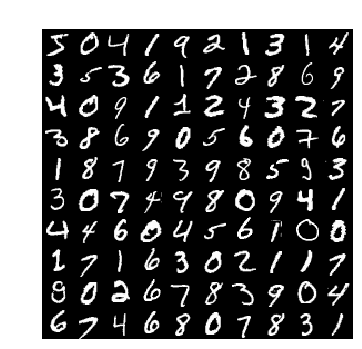

In [30]:
plt.figure(dpi=300)
r = 10
c = 10
i = 0
img_out = np.zeros((28 * r, 28 * c))
for x in range(r):
    for y in range(c):
        im = np.reshape(x_train[i], (28, 28))
        i += 1
        xa, xb = x * 28, (x + 1) * 28
        ya, yb = y * 28, (y + 1) * 28
        img_out[xa:xb, ya:yb] = im

plt.matshow(img_out, cmap="gray")
plt.axis('off')
plt.show()

In [32]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [33]:
sess = sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())

y = tf.nn.softmax(tf.matmul(x, W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)

In [34]:
import numpy as np

train_accuracies = []
test_accuracies = []

for i in range(20000):
    random_indices = np.random.choice(x_train.shape[0], 100, replace=False)
    batch = x_train[random_indices], t_train[random_indices]
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    if i % 1000 == 0:
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        train_accuracies += [accuracy.eval(feed_dict={x: x_train, y_: t_train})]
        test_accuracies += [accuracy.eval(feed_dict={x: x_test, y_: t_test})]
        print("test.acc=%.4f" % test_accuracies[-1])

test.acc=0.3340
test.acc=0.7140
test.acc=0.7400
test.acc=0.7660
test.acc=0.7900
test.acc=0.8040
test.acc=0.8120
test.acc=0.8200
test.acc=0.8280
test.acc=0.8280
test.acc=0.8340
test.acc=0.8360
test.acc=0.8400
test.acc=0.8440
test.acc=0.8440
test.acc=0.8480
test.acc=0.8500
test.acc=0.8500
test.acc=0.8520
test.acc=0.8520


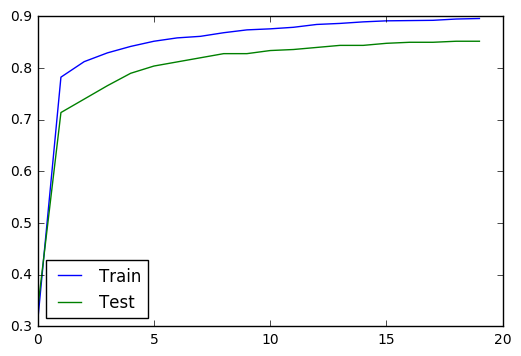

In [35]:
plt.figure()
plt.plot(train_accuracies, label="Train")
plt.plot(test_accuracies, label="Test")
plt.legend(loc=0)
plt.show()

## Higher abstractions?